In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path = "/kaggle/input/creditcardfraud/creditcard.csv"
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**📌 Check Class Distribution**

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


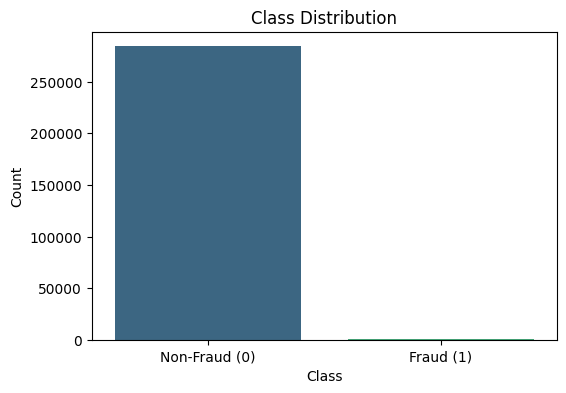

In [5]:
# Count the number of fraud (1) and non-fraud (0) cases
class_counts = df["Class"].value_counts()
print("Class distribution:\n", class_counts)

# Visualize class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks([0, 1], ["Non-Fraud (0)", "Fraud (1)"])
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

> Since the dataset is highly imbalanced (fraud cases are much fewer than non-fraud cases), we need to handle this later.

***Step 2: Data Preprocessing***

* Drop duplicates (if any)
* Normalize the Amount and Time columns

In [6]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("New shape of dataset:", df.shape)

Duplicate rows: 1081
New shape of dataset: (283726, 31)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])
df["Time"] = scaler.fit_transform(df[["Time"]])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


***Step 3: Handling Class Imbalance***

Since fraud cases are rare, will:

* Undersample the majority class using NearMiss
* Oversample the minority class using SMOTE

> 📌 Split Data into Features (X) and Target (y)

In [8]:
X = df.drop(columns=["Class"]) 
y = df["Class"]

> 📌 Use NearMiss (Undersampling)

In [9]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=1)
X_resampled, y_resampled = nm.fit_resample(X, y)
print("Class distribution after NearMiss:", Counter(y_resampled))

Class distribution after NearMiss: Counter({0: 473, 1: 473})


> 📌 Use SMOTE (Oversampling)'

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5)  # Balance fraud cases to 50% of non-fraud cases
X_smote, y_smote = smote.fit_resample(X, y)
print("Class distribution after SMOTE:", Counter(y_smote))

Class distribution after SMOTE: Counter({0: 283253, 1: 141626})


***Step 4: Model Training***

Will train multiple classifiers:

* Logistic Regression
* Support Vector Machine (SVM)
* Random Forest
* Neural Network (Deep Learning)

> 📌 Split Data for Training & Testing

In [11]:
from sklearn.model_selection import train_test_split

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (339903, 30)
Test set shape: (84976, 30)


> 📌 Train Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56651
           1       0.97      0.89      0.93     28325

    accuracy                           0.96     84976
   macro avg       0.96      0.94      0.95     84976
weighted avg       0.96      0.96      0.96     84976



> 📌 Train Support Vector Machine (SVM)

In [13]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     56651
           1       0.98      0.88      0.93     28325

    accuracy                           0.95     84976
   macro avg       0.96      0.94      0.95     84976
weighted avg       0.96      0.95      0.95     84976



> 📌 Train Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     28325

    accuracy                           1.00     84976
   macro avg       1.00      1.00      1.00     84976
weighted avg       1.00      1.00      1.00     84976



***Step 5: Deep Learning Model***

> 📌 Build Neural Network

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (fraud or not)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
10622/10622 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9818 - loss: 0.0515 - val_accuracy: 0.9977 - val_loss: 0.0078
Epoch 2/10
10622/10622 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9983 - loss: 0.0073 - val_accuracy: 0.9986 - val_loss: 0.0051
Epoch 3/10
10622/10622 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 4/10
10622/10622 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0028
Epoch 5/10
10622/10622 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 6/10
10622/10622 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9993 - val_loss: 0.0025
Epoch 7/10
10622/10622 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 8/10
10622/10622 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

In [16]:
# Predict
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate
print(classification_report(y_test, y_pred_nn))

2656/2656 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     28325

    accuracy                           1.00     84976
   macro avg       1.00      1.00      1.00     84976
weighted avg       1.00      1.00      1.00     84976



***Step 6: Model Comparison***

> AUC-PR (Precision-Recall Curve) across models

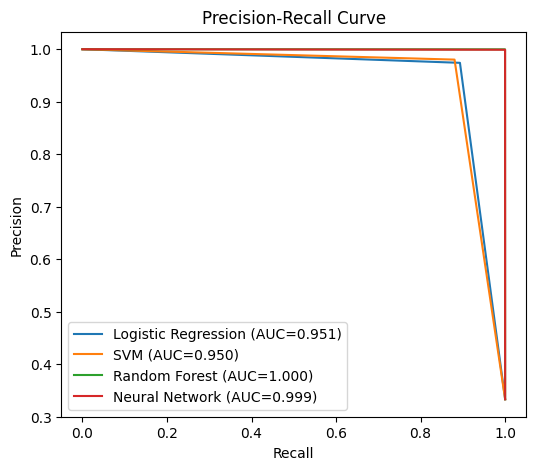

In [17]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate Precision-Recall AUC
def plot_pr_curve(y_true, y_pred, label):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    auc_pr = auc(recall, precision)
    plt.plot(recall, precision, label=f"{label} (AUC={auc_pr:.3f})")

plt.figure(figsize=(6, 5))
plot_pr_curve(y_test, y_pred_lr, "Logistic Regression")
plot_pr_curve(y_test, y_pred_svm, "SVM")
plot_pr_curve(y_test, y_pred_rf, "Random Forest")
plot_pr_curve(y_test, y_pred_nn, "Neural Network")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()